In [16]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
import time
import json

# ============================================================
# PHASE 1: DATA PREPARATION
# ============================================================

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
df=pd.read_csv('mnist.csv')
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary of the dataset:")
display(df.describe())
print("\nChecking for missing values:")
display(df.isnull().sum())
print("\nChecking for duplicates:")
display(df.duplicated().sum())
# Separating features and target variable
X = df.drop('label', axis=1)
y = df['label']
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
# normalizing the feature data
X_normalized = X / 255.0
print("\nFirst 5 rows of the normalized features:")
display(X_normalized.head())
# Flatten images for logistic regression
X_flattened = X_normalized.values
print(f"\nFlattened features shape: {X_flattened.shape}")
# The data is already flattened since each row represents an image so we don't need to reshape further
print("\nData preprocessing completed.")
# Binary classification: Digit '0' vs. Not '0'
mask = (y == 0) | (y == 1)
X_binary = X_flattened[mask]
y_binary = y[mask]
# Splitting the dataset into training and testing and validation sets
X_temp_b, X_train_b, y_temp_b, y_train_b = train_test_split(X_binary, y_binary, test_size=0.6, random_state=42,shuffle=True)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_temp_b, y_temp_b, test_size=0.5, random_state=42,shuffle=True)
print(f"\nTraining set shape: {X_train_b.shape}, {y_train_b.shape}")
print(f"Validation set shape: {X_val_b.shape}, {y_val_b.shape}")
print(f"Testing set shape: {X_test_b.shape}, {y_test_b.shape}")


First 5 rows of the dataset:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.2 MB

Statistical Summary of the dataset:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0



Checking for missing values:


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


Checking for duplicates:


np.int64(0)


Features shape: (70000, 784)
Target shape: (70000,)

First 5 rows of the normalized features:


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Flattened features shape: (70000, 784)

Data preprocessing completed.

Training set shape: (8868, 784), (8868,)
Validation set shape: (2956, 784), (2956,)
Testing set shape: (2956, 784), (2956,)


In [18]:
X_temp_s, X_train_s, y_temp_s, y_train_s = train_test_split(X_flattened, y, test_size=0.6, random_state=42,shuffle=True)
X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(X_temp_s, y_temp_s, test_size=0.5, random_state=42,shuffle=True)
print(f"\nTraining set shape: {X_train_s.shape}, {y_train_s.shape}")
print(f"Validation set shape: {X_val_s.shape}, {y_val_s.shape}")
print(f"Testing set shape: {X_test_s.shape}, {y_test_s.shape}")



Training set shape: (42000, 784), (42000,)
Validation set shape: (14000, 784), (14000,)
Testing set shape: (14000, 784), (14000,)


In [19]:
# Creating a custom Dataset class

# 1 convert Numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train_b, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_b.values, dtype=torch.long).reshape(-1,1)

X_val_tensor = torch.tensor(X_val_b, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_b.values, dtype=torch.long).reshape(-1,1)

X_test_tensor = torch.tensor(X_test_b, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_b.values, dtype=torch.long).reshape(-1,1)

# 2 create a custom Dataset class
class MNISTDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
# 3 create Dataset instances

Batch_size = 64
train_dataset = MNISTDataset(X_train_tensor, y_train_tensor)
val_dataset = MNISTDataset(X_val_tensor, y_val_tensor)
test_dataset = MNISTDataset(X_test_tensor, y_test_tensor)

# 4 create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=Batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=False)
print("\nDataLoaders created:")
print(f" - Training batches: {len(train_loader)}")
print(f" - Validation batches: {len(val_loader)}")
print(f" - Testing batches: {len(test_loader)}")    


DataLoaders created:
 - Training batches: 139
 - Validation batches: 47
 - Testing batches: 47


In [20]:
Xs_train_tensor = torch.tensor(X_train_s, dtype=torch.float32)
Xs_val_tensor = torch.tensor(X_val_s, dtype=torch.float32)
Xs_test_tensor = torch.tensor(X_test_s, dtype=torch.float32)

ys_train_tensor = torch.tensor(y_train_s.values, dtype=torch.long)
ys_val_tensor   = torch.tensor(y_val_s.values, dtype=torch.long)
ys_test_tensor  = torch.tensor(y_test_s.values, dtype=torch.long)



Batch_size = 64
train_dataset_s = MNISTDataset(Xs_train_tensor, ys_train_tensor)
val_dataset_s = MNISTDataset(Xs_val_tensor, ys_val_tensor)
test_dataset_s = MNISTDataset(Xs_test_tensor, ys_test_tensor)

# 4 create DataLoader instances
train_loader_s = DataLoader(train_dataset_s, batch_size=Batch_size, shuffle=True)
val_loader_s = DataLoader(val_dataset_s, batch_size=Batch_size, shuffle=False)
test_loader_s = DataLoader(test_dataset_s, batch_size=Batch_size, shuffle=False)
print("\nDataLoaders created:")
print(f" - Training batches: {len(train_loader_s)}")
print(f" - Validation batches: {len(val_loader_s)}")
print(f" - Testing batches: {len(test_loader_s)}")    



DataLoaders created:
 - Training batches: 657
 - Validation batches: 219
 - Testing batches: 219


In [21]:
print("Binary labels:", torch.unique(y_train_tensor))
print("Softmax labels:", torch.unique(ys_train_tensor))

Binary labels: tensor([0, 1])
Softmax labels: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])



# ============================================================
# PHASE 2: MODEL INITIALIZATION
# ============================================================

In [22]:
N = len(train_loader.dataset)
D = X_train_tensor.shape[1]

print(f"\nNumber of training samples: {N}")
print(f"Number of features: {D}")

w = torch.zeros(D, 1, dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

print(f"\nInitial weights: {w}")
print(f"Initial bias: {b}")

learning_rate=0.01
num_epochs=20

print(f"\nLearning rate: {learning_rate}")



Number of training samples: 8868
Number of features: 784

Initial weights: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],


In [23]:
N = len(train_loader_s.dataset)
D = Xs_train_tensor.shape[1]
C = 10  # Number of classes for softmax

print(f"\nNumber of training samples: {N}")
print(f"Number of features: {D}")
print(f"Number of classes: {C}")

w_s = torch.randn(D, C, dtype=torch.float32) * 0.1
b_s = torch.zeros(C, dtype=torch.float32)

print(f"\nInitial weights shape: {w_s.shape}")
print(f"Initial bias shape: {b_s.shape}")

# Also try a higher learning rate
learning_rate = 0.01  # Increased from 0.01
num_epochs = 20

print(f"\nLearning rate: {learning_rate}")
print(f"Number of epochs: {num_epochs}")


Number of training samples: 42000
Number of features: 784
Number of classes: 10

Initial weights shape: torch.Size([784, 10])
Initial bias shape: torch.Size([10])

Learning rate: 0.01
Number of epochs: 20


# ============================================================
# PHASE 3: DEFINE KEY FUNCTIONS
# ============================================================

In [24]:
def sigmoid(z):
    """Formula: σ(z) = 1 / (1 + e^(-z))"""
    return 1.0 / (1.0 + torch.exp(-z))  # Changed np.exp to torch.exp

def softmax(z):
    z_stable = z - torch.max(z,dim=1,keepdim=True)[0]
    return torch.exp(z_stable)/torch.sum(torch.exp(z_stable),dim=1,keepdim=True)

def compute_predictions(X,w,b):
    """Compute the predicted probabilities using the logistic function."""
    z = torch.matmul(X, w) + b
    return sigmoid(z)

def compute_predictions_softmax(X,w,b):
    """Compute the raw logits for softmax."""
    z = torch.matmul(X, w) + b
    return z

def softmax_cross_loss(y,t):
    probs = softmax(y)
    if t.dim() > 1:
        t = t.squeeze()
    batch_size = y.shape[0]
    correct_probs = probs[torch.arange(batch_size), t]
    loss = -torch.log(correct_probs + 1e-8).mean()
    return loss

def binary_cross_entropy_loss(y, t):
    """
    Computes binary cross-entropy.
    y = predicted probabilities [N, 1]
    t = true labels (0 or 1) [N, 1]
    """
    epsilon = 1e-15  # to avoid log(0)
    y_clipped = torch.clamp(y, epsilon, 1 - epsilon)
    # loss = - [ t*log(y) + (1-t)*log(1-y) ]
    loss = -t * torch.log(y_clipped) - (1 - t) * torch.log(1 - y_clipped)
    return loss

def compute_cost(X, t, w, b):
    """Computes the average binary cross-entropy cost."""
    y = compute_predictions(X, w, b)
    losses = binary_cross_entropy_loss(y, t)
    cost = torch.mean(losses)
    return cost

def compute_cost_softmax(X, t, w, b):
    """Computes the average softmax cross-entropy cost."""
    y = compute_predictions_softmax(X, w, b)
    cost = softmax_cross_loss(y, t)
    return cost

def compute_gradients(X, t, w, b):
    """
    Computes gradients for w and b.
    y = predicted probabilities [N, 1]
    t = true labels (0 or 1) [N, 1]
    """
    N = len(t)
    y = compute_predictions(X, w, b)
    
    # errors = y - t
    errors = y - t  # Shape (N, 1)
    
    # grad_w = (1/N) * X.T @ errors
    grad_w = torch.matmul(X.T, errors) / N  # Shape (D, 1)
    
    # grad_b = (1/N) * sum(errors)
    grad_b = torch.sum(errors) / N  # Shape (1,)
    
    return grad_w, grad_b

def compute_gradients_softmax(X, t, w, b):
    """
    Computes gradients for w and b for softmax.
    """
    N = len(t)
    y = compute_predictions_softmax(X, w, b)
    
    # Softmax probabilities
    probs = softmax(y)
    
    # Convert labels to one-hot if needed
    if t.dim() == 1:
        t_one_hot = torch.zeros_like(probs)
        t_one_hot[torch.arange(N), t] = 1
    else:
        t_one_hot = t
    
    # errors = probs - one_hot_labels
    errors = probs - t_one_hot
    
    # grad_w = (1/N) * X.T @ errors
    grad_w = torch.matmul(X.T, errors) / N
    
    # grad_b = (1/N) * sum(errors)
    grad_b = torch.sum(errors, dim=0) / N
    
    return grad_w, grad_b

def compute_accuracy(X, t, w, b):
    """
    Computes classification accuracy.
    X = features, t = true labels (0 or 1)
    """
    # Get predicted probabilities [N, 1]
    y = compute_predictions(X, w, b)
    
    # Convert probabilities to class labels (0 or 1)
    # torch.round() handily converts > 0.5 to 1 and <= 0.5 to 0
    y_preds = torch.round(y)
    
    # Compare predicted labels to true labels
    correct = (y_preds == t)
    
    # Calculate the mean of correct predictions
    # .float() converts boolean True/False to 1.0/0.0
    accuracy = torch.mean(correct.float())
    
    return accuracy.item() # Return as a Python number

def compute_accuracy_softmax(X, t, w, b):
    """
    Computes classification accuracy for softmax.
    """
    y = compute_predictions_softmax(X, w, b)
    probs = softmax(y)
    y_preds = torch.argmax(probs, dim=1)
    
    if t.dim() > 1:
        t = t.squeeze()
    
    correct = (y_preds == t)
    accuracy = torch.mean(correct.float())
    return accuracy.item()

# ============================================================
# PHASE 4: TRAINING LOOP (GRADIENT DESCENT)
# ============================================================

In [25]:
cost_history = []
val_cost_history = []
acc_history = []     
val_acc_history = [] 
best_val_cost = float('inf') 
best_w = None
best_b = None
start_train_lr = time.time()

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader: 
        
        # Calculate gradients
        grad_w, grad_b = compute_gradients(X_batch, y_batch, w, b)
        
        # Update weights (manual gradient descent)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b
    
    # Calculate and store the cost over the *entire* training set
    cost = compute_cost(X_train_tensor, y_train_tensor, w, b)
    val_cost = compute_cost(X_val_tensor, y_val_tensor, w, b).item()
    cost_history.append(cost.item()) # .item() gets the Python scalar
    val_cost_history.append(val_cost)
    
    acc = compute_accuracy(X_train_tensor, y_train_tensor, w, b)
    val_acc = compute_accuracy(X_val_tensor, y_val_tensor, w, b)
    acc_history.append(acc)
    val_acc_history.append(val_acc)
    
    if val_cost < best_val_cost:
        best_val_cost = val_cost
        best_w = w.clone()
        best_b = b.clone()
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}, Train Cost: {cost:.4f}, Val Cost: {val_cost:.4f}, Train Acc: {acc:.4f}, Val Acc: {val_acc:.4f}")

print("\nTraining completed.")
end_train_lr = time.time()
training_time_lr = end_train_lr - start_train_lr
print(f"Training Time: {training_time_lr:.2f} seconds")

    

Epoch 1, Train Cost: 0.0914, Val Cost: 0.0940, Train Acc: 0.9976, Val Acc: 0.9942
Epoch 5, Train Cost: 0.0274, Val Cost: 0.0301, Train Acc: 0.9981, Val Acc: 0.9953
Epoch 10, Train Cost: 0.0173, Val Cost: 0.0196, Train Acc: 0.9981, Val Acc: 0.9966
Epoch 15, Train Cost: 0.0135, Val Cost: 0.0156, Train Acc: 0.9982, Val Acc: 0.9966
Epoch 20, Train Cost: 0.0115, Val Cost: 0.0133, Train Acc: 0.9982, Val Acc: 0.9970

Training completed.
Training Time: 0.92 seconds


In [26]:

cost_s_history = []
val_cost_s_history = []
acc_s_history = []     
val_acc_s_history = []  
start_train_manual = time.time()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader_s: 
        
        # Calculate gradients
        grad_w_s, grad_b_s = compute_gradients_softmax(X_batch, y_batch, w_s, b_s)
        
        # Update weights (manual gradient descent)
        w_s -= learning_rate * grad_w_s
        b_s -= learning_rate * grad_b_s
    
    # Calculate and store the cost over the *entire* training set
    cost_s = compute_cost_softmax(Xs_train_tensor, ys_train_tensor, w_s, b_s)
    val_cost_s = compute_cost_softmax(Xs_val_tensor, ys_val_tensor, w_s, b_s).item()
    cost_s_history.append(cost_s.item())
    val_cost_s_history.append(val_cost_s)
    acc_s = compute_accuracy_softmax(Xs_train_tensor, ys_train_tensor, w_s, b_s)
    val_acc_s = compute_accuracy_softmax(Xs_val_tensor, ys_val_tensor, w_s, b_s)
    acc_s_history.append(acc_s)
    val_acc_s_history.append(val_acc_s)
    
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}, Train Cost: {cost_s:.4f}, Val Cost: {val_cost_s:.4f}, Train Acc: {acc_s:.4f}, Val Acc: {val_acc_s:.4f}")
        
end_train_manual = time.time()
training_time_manual = end_train_manual - start_train_manual

print("\nSoftmax training completed.")

Epoch 1, Train Cost: 0.7694, Val Cost: 0.7769, Train Acc: 0.8047, Val Acc: 0.8014
Epoch 5, Train Cost: 0.4414, Val Cost: 0.4497, Train Acc: 0.8788, Val Acc: 0.8776
Epoch 10, Train Cost: 0.3779, Val Cost: 0.3876, Train Acc: 0.8949, Val Acc: 0.8941
Epoch 15, Train Cost: 0.3501, Val Cost: 0.3618, Train Acc: 0.9022, Val Acc: 0.8996
Epoch 20, Train Cost: 0.3337, Val Cost: 0.3466, Train Acc: 0.9069, Val Acc: 0.9036

Softmax training completed.



# ============================================================
# PHASE 7: VISUALIZATION
# ============================================================

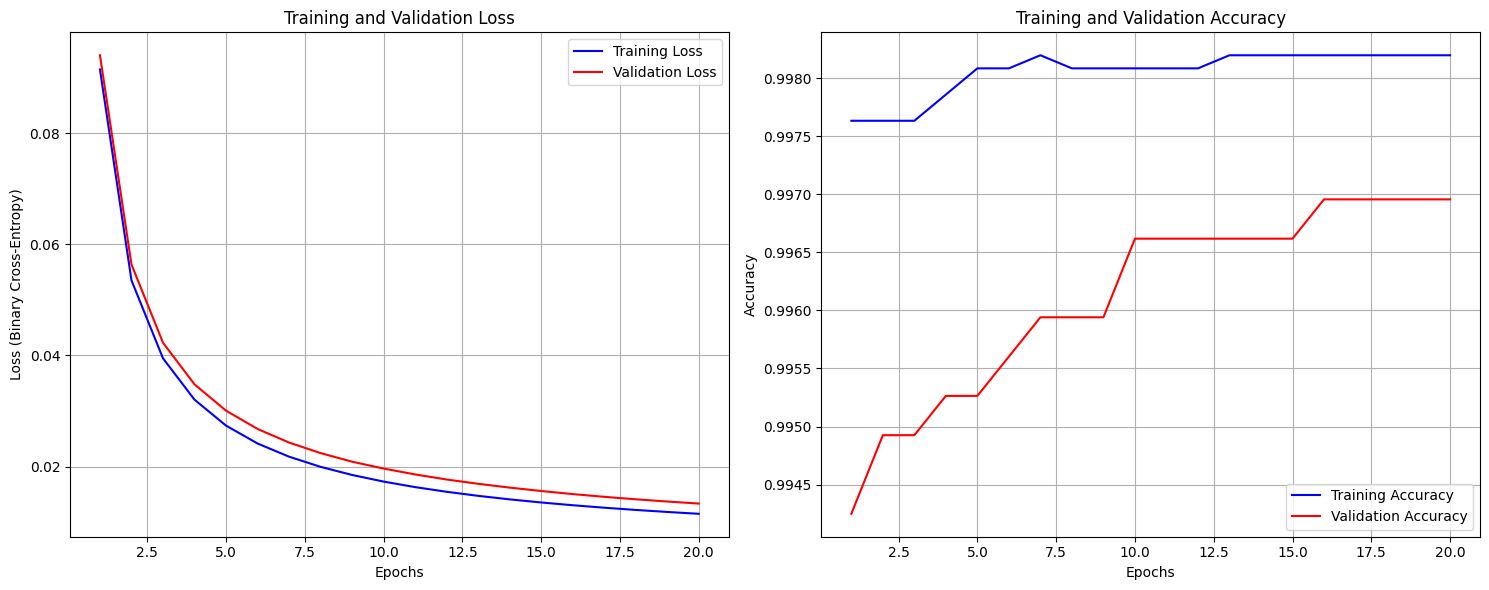


Final Test Accuracy: 99.76%
Final Test Loss: 0.0122


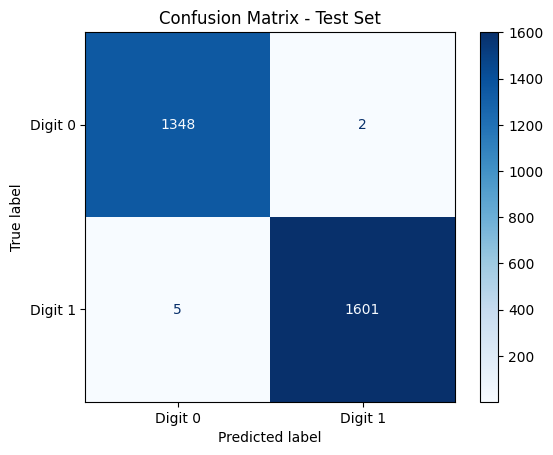

In [27]:
# Create a 1x2 grid of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
epochs = range(1, len(cost_history) + 1)

# --- Plot 1: Loss Curves ---
ax1.plot(epochs, cost_history, 'b-', label='Training Loss')
ax1.plot(epochs, val_cost_history, 'r-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss (Binary Cross-Entropy)')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Accuracy Curves ---
ax2.plot(epochs, acc_history, 'b-', label='Training Accuracy')
ax2.plot(epochs, val_acc_history, 'r-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


# --- Final Evaluation on Test Set ---

# Calculate final test accuracy using the best weights
test_accuracy = compute_accuracy(X_test_tensor, y_test_tensor, best_w, best_b)
test_loss = compute_cost(X_test_tensor, y_test_tensor, best_w, best_b).item()
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")
logreg_results = {
    "training_time_lr": training_time_lr,
    "test_accuracy": test_accuracy,
    "test_loss": test_loss
}
with open("logreg_results.json", "w") as f:
    json.dump(logreg_results, f)

# --- Generate Confusion Matrix ---

# Get predictions on the test set
y_probs_test = compute_predictions(X_test_tensor, best_w, best_b)
y_preds_test = torch.round(y_probs_test)

# Convert tensors to NumPy arrays for scikit-learn
t_test_np = y_test_tensor.numpy()
y_preds_np = y_preds_test.numpy()

# Generate the confusion matrix
cm = confusion_matrix(t_test_np, y_preds_np)
display_labels = ['Digit 0', 'Digit 1']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()

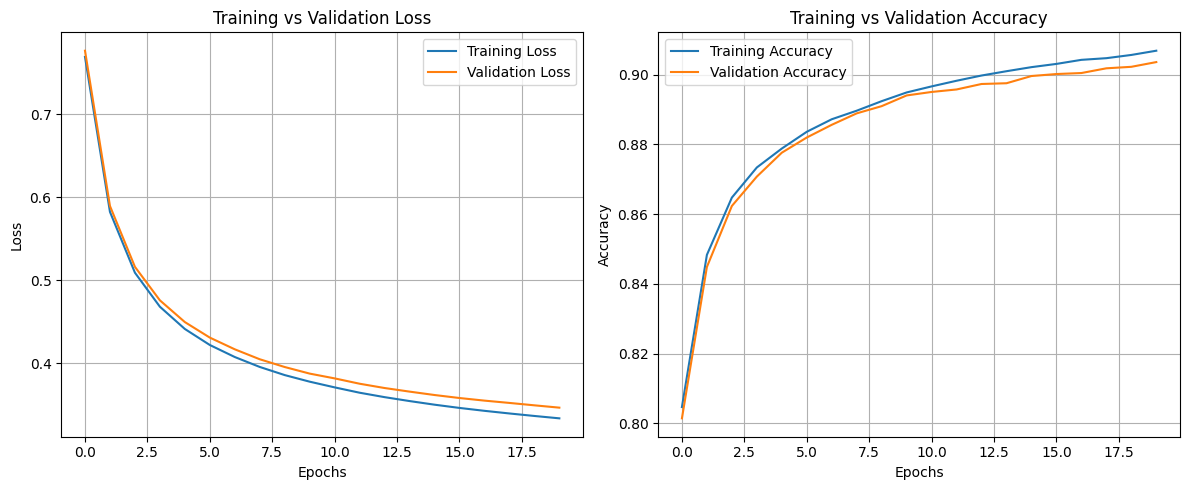

In [28]:
plt.figure(figsize=(12,5))

# --- Loss ---
plt.subplot(1,2,1)
plt.plot(cost_s_history, label='Training Loss')
plt.plot(val_cost_s_history, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# --- Accuracy ---
plt.subplot(1,2,2)
plt.plot(acc_s_history, label='Training Accuracy')
plt.plot(val_acc_s_history, label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Test Set Accuracy: 90.7643
Built-in Softmax Accuracy: 90.76%
Manual Softmax Test Loss: 0.3350
Built-in Softmax Test Loss: 0.3350


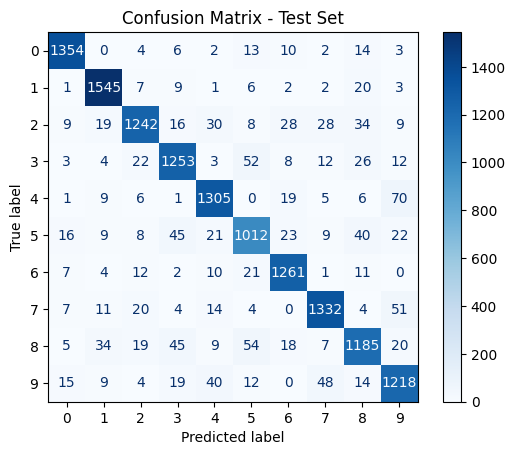

In [32]:
#  test accuracy
test_acc = compute_accuracy_softmax(Xs_test_tensor, ys_test_tensor, w_s, b_s)
print(f"Test Set Accuracy: {test_acc*100:.4f}")

#  predictions
logits_test = compute_predictions_softmax(Xs_test_tensor, w_s, b_s)
probs_test = softmax(logits_test)
y_preds_test = torch.argmax(probs_test, dim=1)

#  accuracy with built-in softmax
start_train_builtin = time.time()
probs_test_builtin = torch.softmax(logits_test, dim=1)
y_preds_test_builtin = torch.argmax(probs_test_builtin, dim=1)
test_acc_builtin = (y_preds_test_builtin == ys_test_tensor).float().mean()
print(f"Built-in Softmax Accuracy: {test_acc_builtin*100:.2f}%")
end_train_builtin = time.time()
training_time_builtin = end_train_builtin - start_train_builtin

probs_test = softmax(logits_test)

# Compute cross-entropy test loss (manual)
test_loss_manual = compute_cost_softmax(Xs_test_tensor, ys_test_tensor, w_s, b_s).item()
print(f"Manual Softmax Test Loss: {test_loss_manual:.4f}")

# Compute cross-entropy test loss (built-in)
criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    logits_test = compute_predictions_softmax(Xs_test_tensor, w_s, b_s)
    test_loss_builtin = criterion(logits_test, ys_test_tensor).item()

print(f"Built-in Softmax Test Loss: {test_loss_builtin:.4f}")

softmax_results = {
    "training_time_builtin": float(training_time_builtin),
    "test_accuracy_builtin": float(test_acc_builtin),
    "test_loss_builtin": float(test_loss_builtin),
    "test_accuracy_manual": float(test_acc),
    "test_loss_manual": float(test_loss_manual),
    "train_time_manual": float(training_time_manual)
}

with open("softmax_results.json", "w") as f:
    json.dump(softmax_results, f, indent=4)



# R matrix
cm = confusion_matrix(ys_test_tensor, y_preds_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()


Class 0: Accuracy = 0.9616
Class 1: Accuracy = 0.9680
Class 2: Accuracy = 0.8728
Class 3: Accuracy = 0.8982
Class 4: Accuracy = 0.9177
Class 5: Accuracy = 0.8398
Class 6: Accuracy = 0.9488
Class 7: Accuracy = 0.9205
Class 8: Accuracy = 0.8489
Class 9: Accuracy = 0.8832


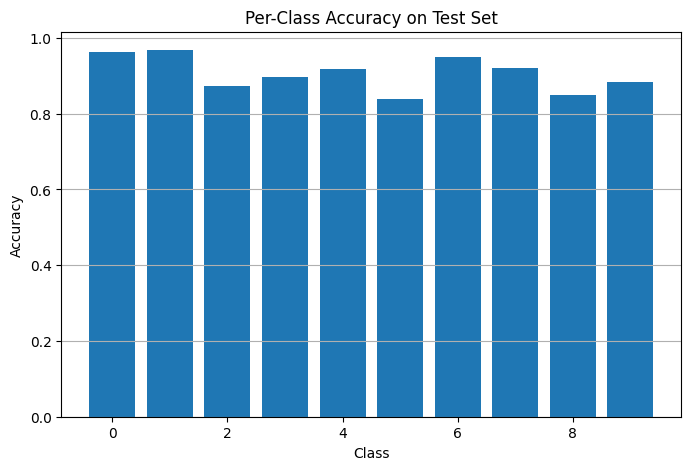

In [31]:
# Per-class accuracy
cm = confusion_matrix(ys_test_tensor, y_preds_test)
class_correct = cm.diagonal()
class_total = cm.sum(axis=1)
per_class_acc = class_correct / class_total

# Display s table
for i, acc in enumerate(per_class_acc):
    print(f"Class {i}: Accuracy = {acc:.4f}")

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(10), per_class_acc)
plt.title("Per-Class Accuracy on Test Set")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()
